<a href="https://colab.research.google.com/github/plaban1981/Hugging_Face_transformers_topics/blob/main/Hugging_Face_%2B_Computer_Vision_Vegetable_Image_Classifier_using_HuggingPics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import required Libraries

In [1]:
!pip install -q transformers -U

     |████████████████████████████████| 5.3 MB 34.2 MB/s 
     |████████████████████████████████| 163 kB 78.7 MB/s 
     |████████████████████████████████| 7.6 MB 51.4 MB/s 


In [2]:
from transformers import ViTFeatureExtractor, ViTForImageClassification
from PIL import Image
import requests

## Download Image from the given URL

In [3]:
url = 'https://www.freeimageslive.co.uk/files/images011/radish.jpg'
image = Image.open(requests.get(url, stream=True).raw)

## Display The downloaded image

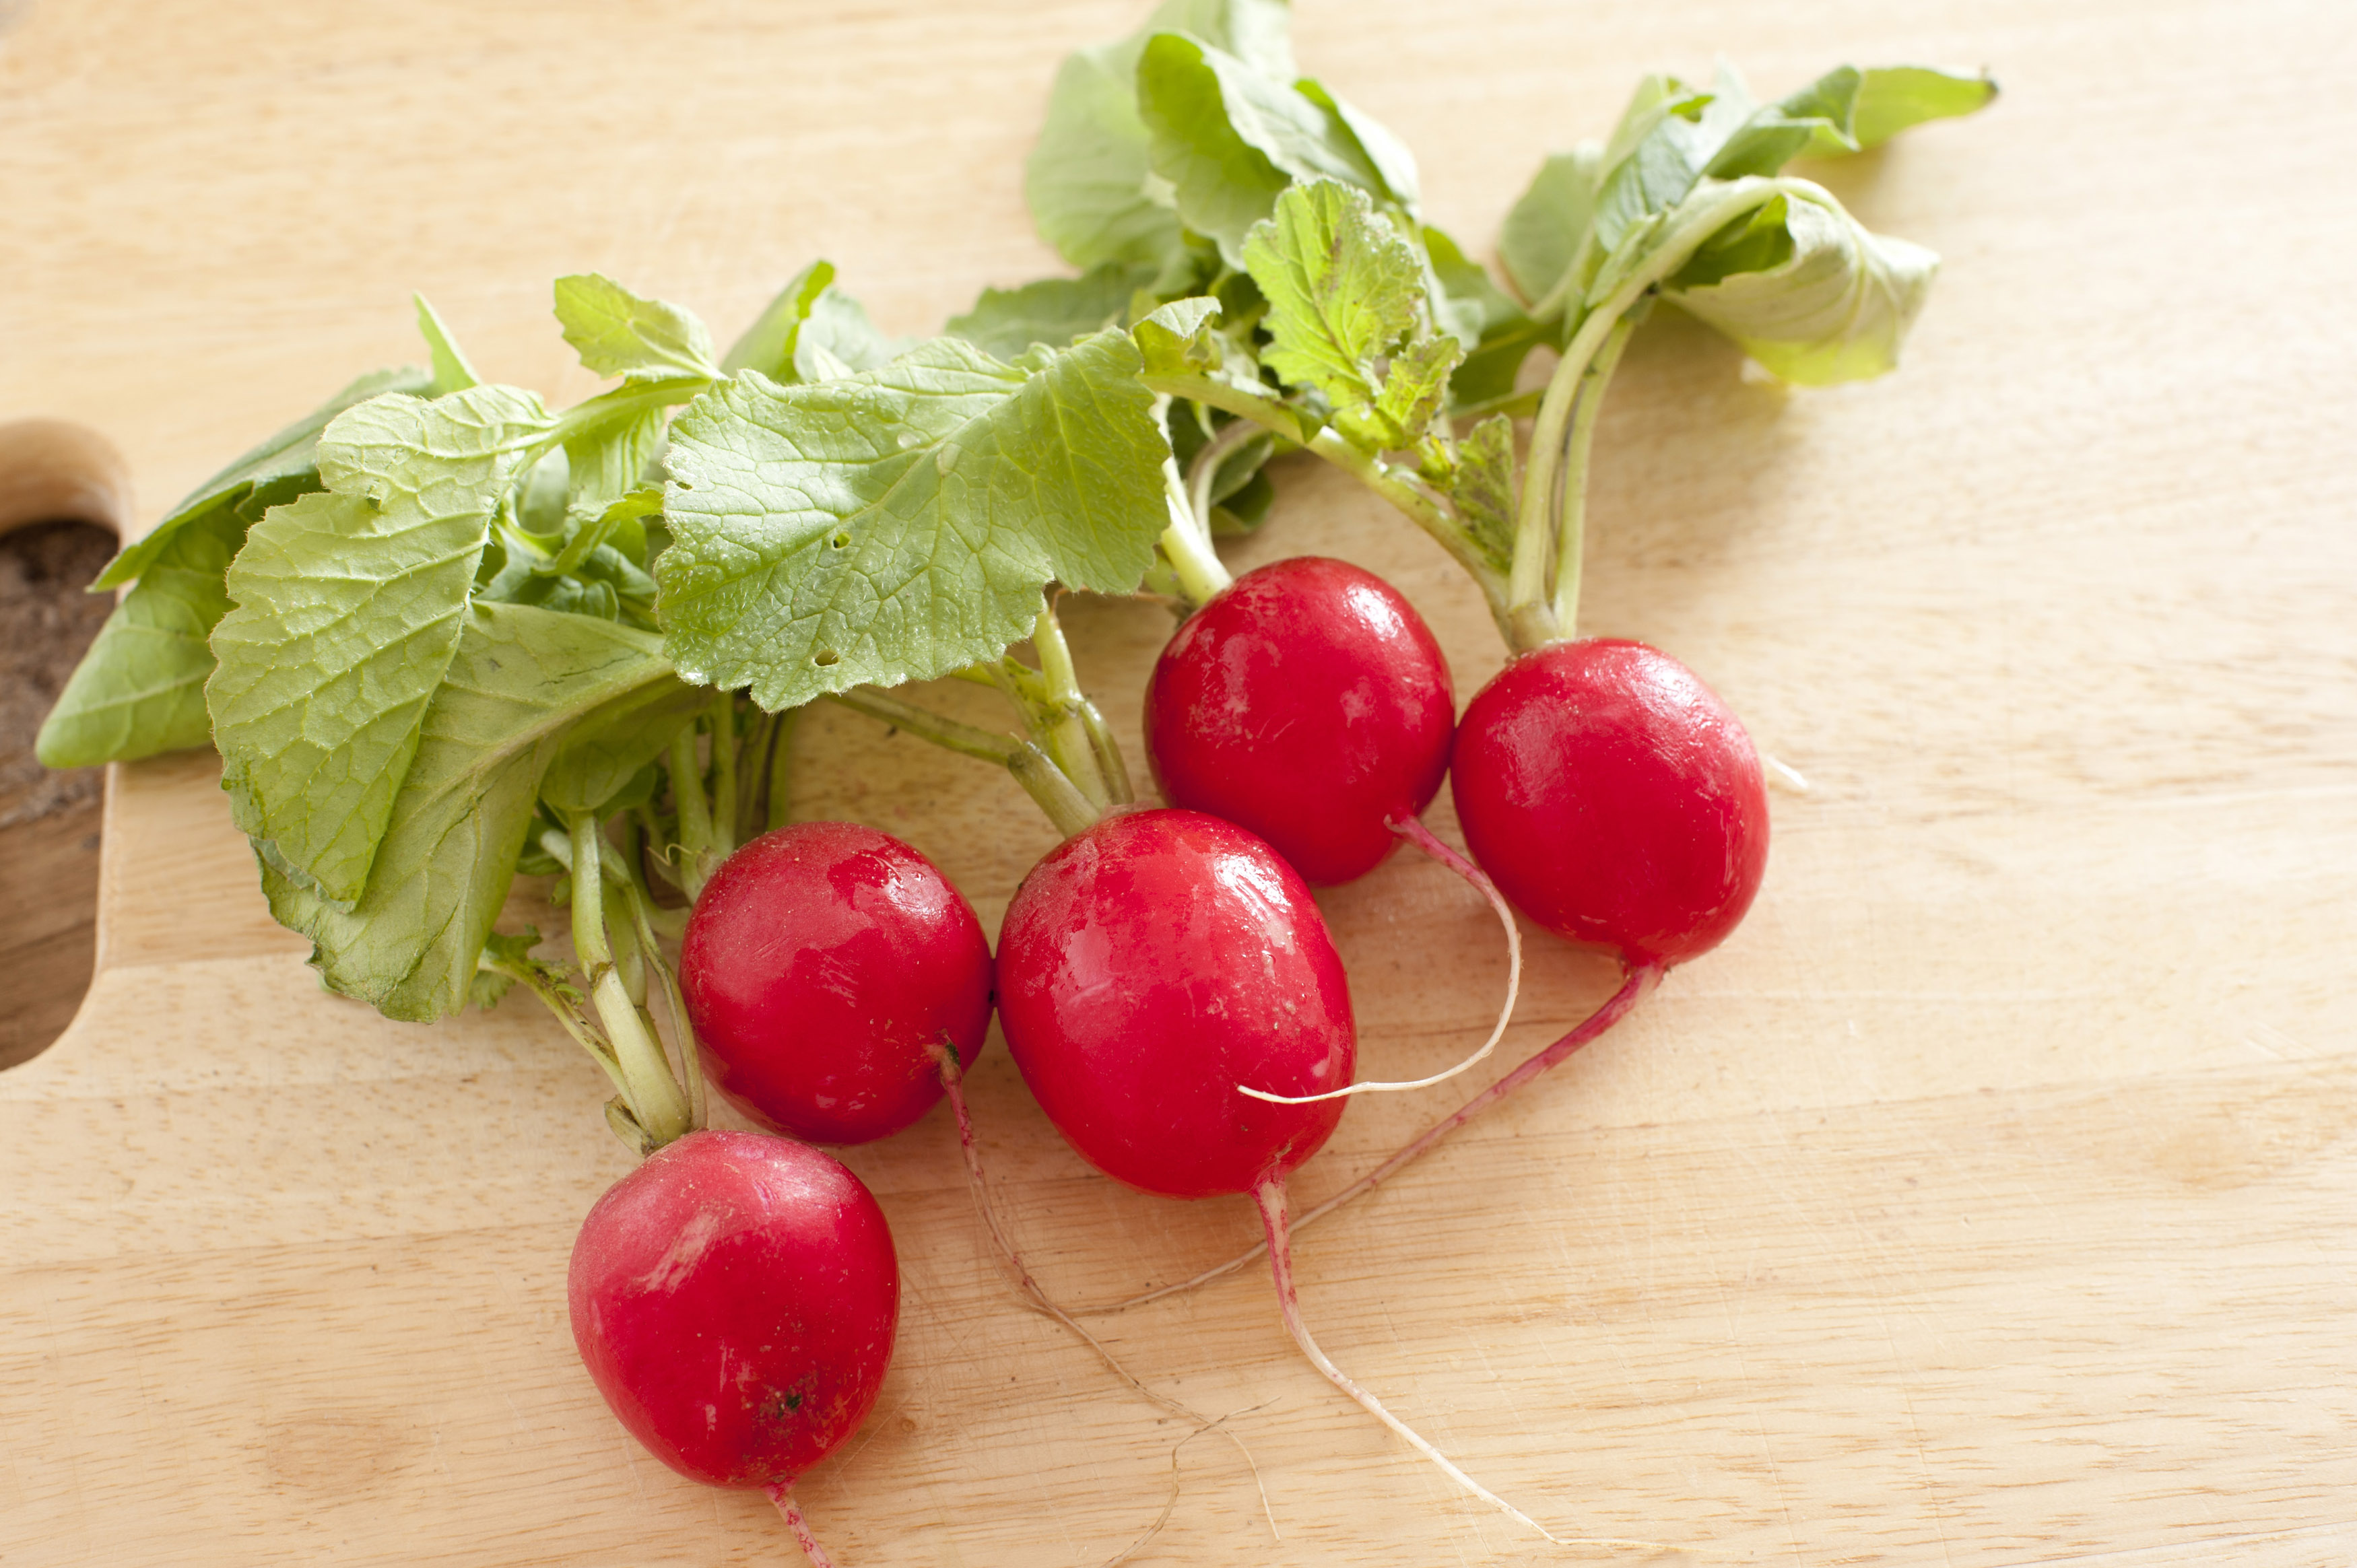

In [4]:
display(image)

## Download Pre-trained Model

In [5]:
feature_extractor = ViTFeatureExtractor.from_pretrained("Plaban81/vegetable-classifier")
model = ViTForImageClassification.from_pretrained("Plaban81/vegetable-classifier")

Downloading:   0%|          | 0.00/228 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/861 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/343M [00:00<?, ?B/s]

## Extract Features

In [6]:
inputs = feature_extractor(images=image, return_tensors="pt")

## Model Inference

In [7]:
outputs = model(**inputs)

In [11]:
outputs

ImageClassifierOutput(loss=None, logits=tensor([[-0.1053, -0.5405, -0.4643,  1.0800, -0.0724]],
       grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [8]:
logits = outputs.logits

In [9]:
logits

tensor([[-0.1053, -0.5405, -0.4643,  1.0800, -0.0724]],
       grad_fn=<AddmmBackward0>)

## Infer Labels

In [12]:
model.config.id2label

{0: 'Brinjal', 1: 'Cabbage', 2: 'Cauliflower', 3: 'Raddish', 4: 'Tomato'}

In [10]:
predicted_class_idx = logits.argmax(-1).item()
print("Predicted class:", model.config.id2label[predicted_class_idx])

Predicted class: Raddish


* Model has predicted the image to be of Raddish